# DOING INCOME SPENT ANALYSIS OF CUSTOMERS USING HIERARCHICAL CLUSTERING 

    - THE IDEA IS TO BUILD A HEIRARCHY OF CLUSTERS !!!

    - FOR HIERARCHICAL CLUSTERING THE ALGO WORKS ON CREATING A DISTANCE MATRIX; 
     THE DISTANCE IS CALCULATED BASED ON DIFFERENT METRICS:
        - FROM WHERE TO CALCULATE THE DISTANCES : SINGLE LINKAGE, COMPLETE LINKAGE, MEAN, BASED ON WCSS !!!
        - AGGLOMERATIVE & DIVISIVE



In [30]:
# IMPORT STANDARD LIBRARIES

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# READING THE DATASET 

data = pd.read_csv('dataset.csv')

# DROP CUSTOMER ID

data = data.iloc[:,1:]

print(data.shape)
print(data.head(5))
print(data.describe())



(200, 4)
   Gender  Age  Annual Income (k$)  Spending Score
0    Male   19                  15              39
1    Male   21                  15              81
2  Female   20                  16               6
3  Female   23                  16              77
4  Female   31                  17              40
              Age  Annual Income (k$)  Spending Score
count  200.000000          200.000000      200.000000
mean    38.850000           60.560000       50.200000
std     13.969007           26.264721       25.823522
min     18.000000           15.000000        1.000000
25%     28.750000           41.500000       34.750000
50%     36.000000           61.500000       50.000000
75%     49.000000           78.000000       73.000000
max     70.000000          137.000000       99.000000


In [31]:
# PREPROCESSING
# TRANSFORMING CATEGORICAL COLUMN TO NUMERICAL COLUMN 

mapper = {'Male':0, 'Female':1}
data['Gender'] = data['Gender'].map(mapper)

print(data.head(5))

   Gender  Age  Annual Income (k$)  Spending Score
0       0   19                  15              39
1       0   21                  15              81
2       1   20                  16               6
3       1   23                  16              77
4       1   31                  17              40


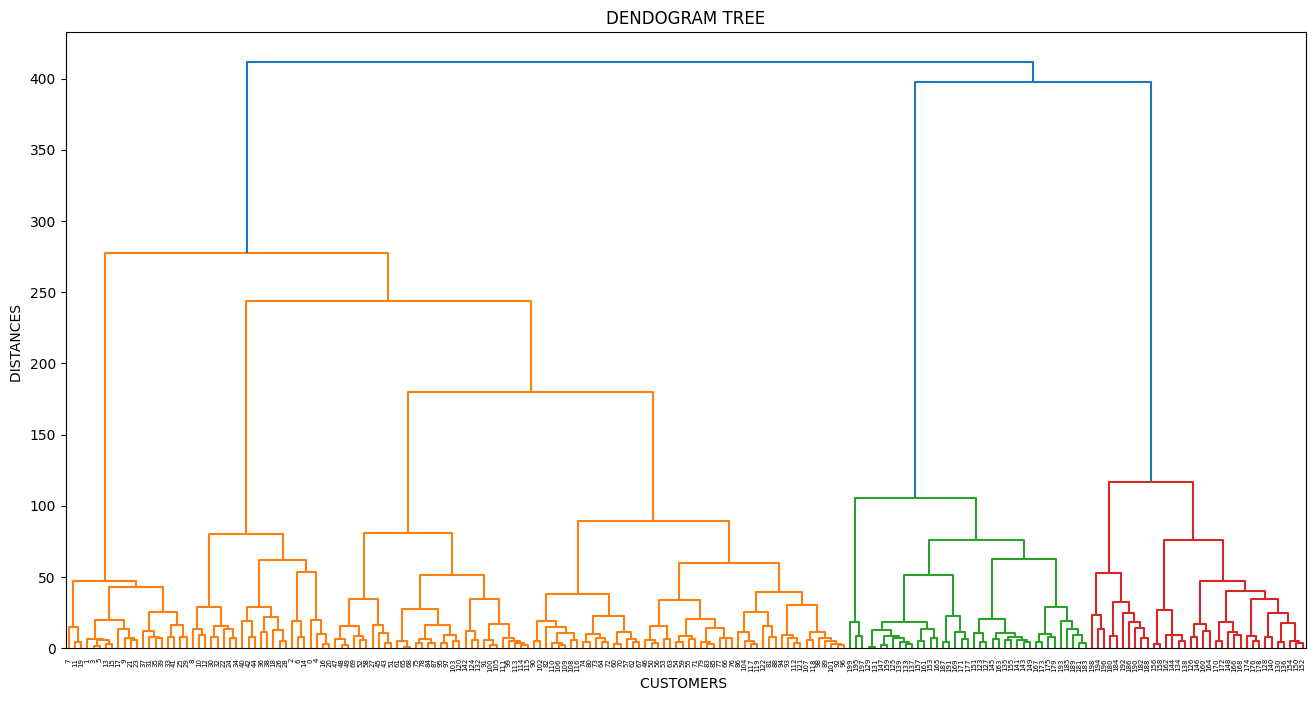

In [32]:
# DENDROGRAM VISUALISATION '

import scipy.cluster.hierarchy as clus

plt.figure(1, figsize = (16 ,8))
dendrogram = clus.dendrogram(clus.linkage(data, method  = "ward"))

plt.title('DENDOGRAM TREE')
plt.xlabel('CUSTOMERS ')
plt.ylabel('DISTANCES ')
plt.show()

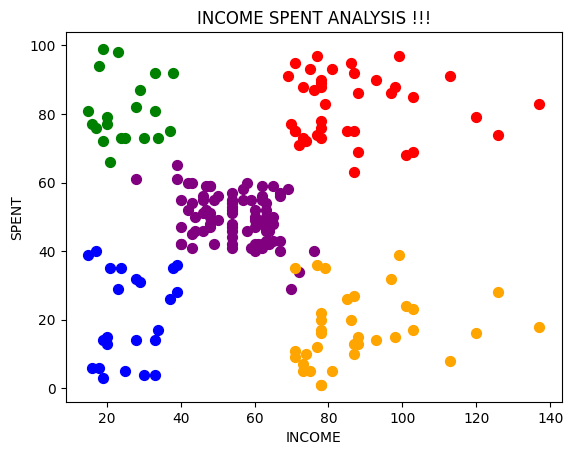

In [34]:
# FORMING CLUSTERS 

from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters = 5, metric=  'euclidean', linkage ='ward')
y_means = model.fit_predict(data)

# VISUALISATIONS

X = data.iloc[:, [2,3]].values
plt.scatter(X[y_means==0, 0], X[y_means==0, 1], s=50, c='purple', label ='Cluster 1')
plt.scatter(X[y_means==1, 0], X[y_means==1, 1], s=50, c='orange', label ='Cluster 2')
plt.scatter(X[y_means==2, 0], X[y_means==2, 1], s=50, c='red', label ='Cluster 3')
plt.scatter(X[y_means==3, 0], X[y_means==3, 1], s=50, c='green', label ='Cluster 4')
plt.scatter(X[y_means==4, 0], X[y_means==4, 1], s=50, c='blue', label ='Cluster 5')


plt.title('INCOME SPENT ANALYSIS !!!')
plt.xlabel('INCOME')
plt.ylabel('SPENT')
plt.show()